In [1]:
# this script is a work-in-progress to stream forecast data every hour continuously

# another script should be written to update the historical weather data with the current weather (NOT streaming)
new_weather_start = '2019-02-10 00:00:00'

In [2]:
import pandas as pd
import numpy as np

import requests
import json

import utility_functions as fn
import time, datetime

In [3]:
# city id for New Haven 
nhid = 4839366

# start and end dates (unix time, 00:00:00 on day of interest)
start = int(time.mktime(datetime.date(2019,2,10).timetuple()))
end = int(time.mktime(datetime.date(2019,3,3).timetuple()))

# API key 
key = '9891777d6b10123f5d478000d231e6b9'

params = {'id': nhid,
          'key': key,
          'type': 'hour',
          'start': start,
          'end': end
         }

request = requests.get('http://api.openweathermap.org/data/2.5/history/city?',params=params)

print(request.status_code)

data = request.json()

# with open('weather.txt','w') as file:
#     file.write(json.dumps(data, indent=4, sort_keys=True))

data

401


{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [4]:
# read from weatherbit api for 48-hour forecast
nhid = 4839366
key = '39853ac984bf47d6a8358b9d4d8ae00c'
params = {'city_id': nhid,
          'key': key,
         }

request = requests.get('https://api.weatherbit.io/v2.0/forecast/hourly',params=params)
print(request.status_code)

json = request.json()
forecast = pd.DataFrame.from_dict(json['data'])

200


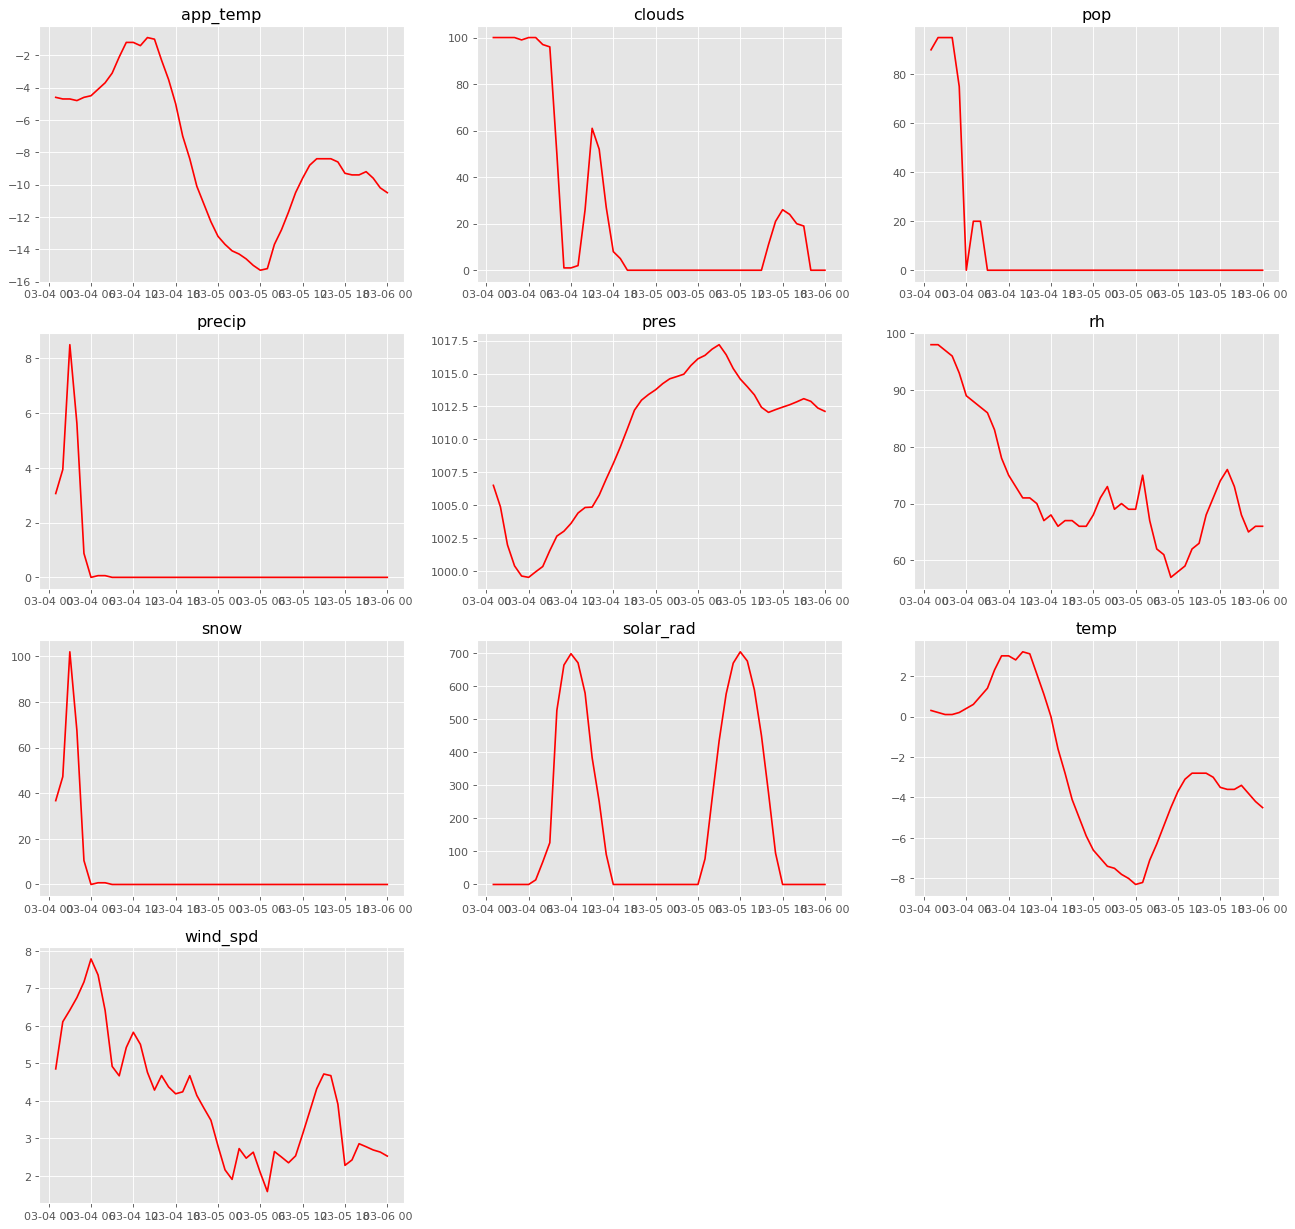

In [5]:
# reindex by appropriate datetime
forecast.index = pd.to_datetime(forecast['timestamp_local'],format='%Y-%m-%dT%H:00:00')
forecast.index.names = ['']

# remove unused columns
forecast.drop(['snow_depth','wind_cdir','wind_cdir','wind_cdir_full','wind_gust_spd','uv',
               'datetime','timestamp_local','timestamp_utc','ts','vis','weather','wind_dir',
               'dhi','dni','ghi','slp','dewpt','clouds_hi','clouds_low','clouds_mid','ozone',
               'pod'],axis=1,inplace=True)

fn.plot_all(forecast,'2019-03-04 01:00:00','2019-03-06 00:00:00')

In [6]:
# working on using multi index to store hourly prediction data
# arrays = [[forecast.index[0]],[]]
# pd.MultiIndex.from_arrays([[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']], names=('pred_hour', 'hour'))